### Spam Classifier 

In [732]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [733]:
dataset=pd.read_csv("C:\\Users\\Dell\\Downloads\\spam.csv",encoding="latin-1")
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [734]:
df=pd.DataFrame(dataset)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [735]:
df.shape

(5572, 5)

In [736]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [737]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [738]:
mapp={"ham":0,"spam":1}
df["v1"]=df["v1"].map(mapp)
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [739]:
df["label"]=df["v1"]
df["text"]=df["v2"]
df.drop(["v1","v2"],axis=1,inplace=True)

In [740]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [741]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [742]:
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [743]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [744]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize

In [745]:
stopword=set(stopwords.words("english"))
lemmatizer=WordNetLemmatizer()

In [746]:
import re
def remove_num(text):
    return re.sub(r'\d+'," ",text)

df["text"]=df["text"].apply(remove_num)

In [747]:
def clean_text(text):
    text=text.lower()
    text=text.translate(str.maketrans("","",string.punctuation))
    text=re.sub(r'[^a-zA-Z]'," ",text)
    words=word_tokenize(text)
    cleaned_text=[lemmatizer.lemmatize(word) for word in words if word not in stopword and len(word)>2]
    return " ".join(cleaned_text)
    

In [748]:
df["text_clean"]=df["text"].apply(clean_text)
df.head()

,label,text,text_clean
0,0,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,0,Ok lar... Joking wif u oni...,lar joking wif oni
2,1,Free entry in a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts may te...
3,0,U dun say so early hor... U c already then say...,dun say early hor already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


In [749]:
df["text"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [750]:
df["text_clean"][0]

'jurong point crazy available bugis great world buffet cine got amore wat'

In [751]:
df.drop(["text"],axis=1,inplace=True)

In [752]:
df.shape

(5572, 2)

In [753]:
#Convert text to vector 
from sklearn.feature_extraction.text import CountVectorizer
vector=CountVectorizer(stop_words="english",max_features=3000,min_df=5,max_df=0.8)
x=vector.fit_transform(df["text_clean"])
print(f"Vocabulary: {vector.get_feature_names_out()}")
print(x.toarray())
print(x.toarray().shape)
print(x[0].toarray())
print(vector.vocabulary_)
print(len(vector.vocabulary_))


Vocabulary: ['abiola' 'able' 'abt' ... 'yun' 'yup' 'zed']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(5572, 1342)
[[0 0 0 ... 0 0 0]]
{'point': 846, 'crazy': 246, 'available': 70, 'bugis': 140, 'great': 454, 'world': 1303, 'cine': 197, 'got': 452, 'wat': 1255, 'lar': 594, 'joking': 570, 'wif': 1279, 'free': 409, 'entry': 346, 'wkly': 1290, 'comp': 218, 'win': 1283, 'cup': 251, 'final': 386, 'text': 1128, 'receive': 904, 'txt': 1193, 'apply': 45, 'dun': 323, 'say': 962, 'early': 327, 'nah': 746, 'dont': 310, 'think': 1137, 'usf': 1220, 'life': 620, 'freemsg': 410, 'hey': 489, 'darling': 265, 'week': 1267, 'word': 1299, 'like': 624, 'fun': 424, 'xxx': 1320, 'std': 1071, 'send': 985, 'brother': 135, 'speak': 1052, 'treat': 1178, 'request': 924, 'set': 991, 'callertune': 153, 'caller': 152, 'press': 862, 'copy': 236, 'friend': 415, 'winner': 1285, 'valued': 1227, 'network': 754, 'customer': 255, 'selected': 980, '

In [754]:
#split train and test
y=df["label"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [755]:
from sklearn.linear_model import LogisticRegression
nb=LogisticRegression()
nb.fit(x_train,y_train)

LogisticRegression()

In [756]:
train_accuracy=nb.score(x_train,y_train)
print(train_accuracy)

0.9869867623962306


In [757]:
y_pred_test=nb.predict(x_test)

In [758]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,y_pred_test))

0.9739910313901345


In [759]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



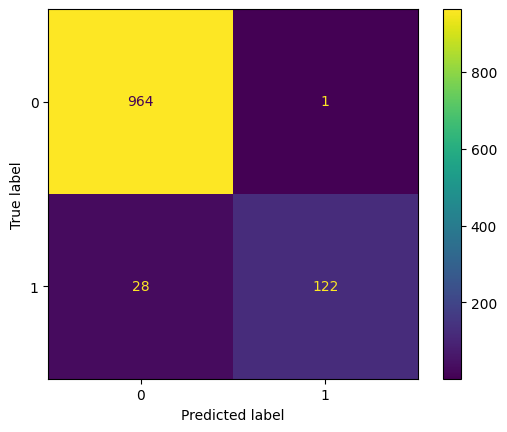

In [760]:
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred_test)
ConfusionMatrixDisplay(cm).plot()
plt.show()

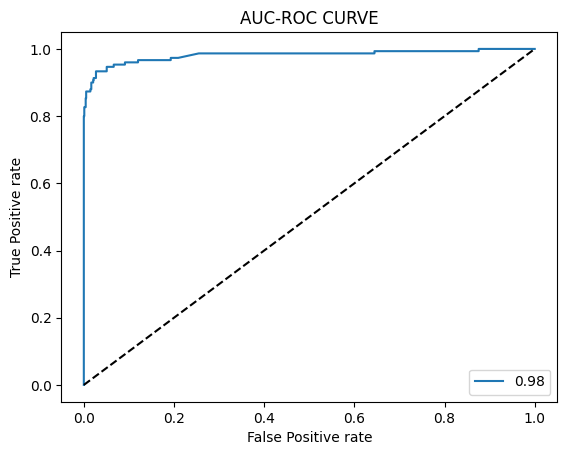

In [761]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob=nb.predict_proba(x_test)[:,1]

fpr,tpr,thresold=roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label=f"{round(roc_auc_score(y_test,y_pred_prob),2)}")
plt.plot([0,1],[0,1],linestyle="dashed",color="black")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("AUC-ROC CURVE")
plt.legend()
plt.show()

#### TF-IDF

In [762]:
#Convert text to vector 
from sklearn.feature_extraction.text import TfidfVectorizer
vector1=TfidfVectorizer(stop_words="english")
x1=vector.fit_transform(df["text_clean"])


In [763]:
y=df["label"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=42)

In [764]:
from sklearn.linear_model import LogisticRegression
nb2=LogisticRegression()
nb2.fit(x_train,y_train)

LogisticRegression()

In [765]:
train_accuracy=nb2.score(x_train,y_train)
print(train_accuracy)

0.9869867623962306


In [766]:
y_pred_test=nb2.predict(x_test)

In [767]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,y_pred_test))

0.9739910313901345


In [768]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



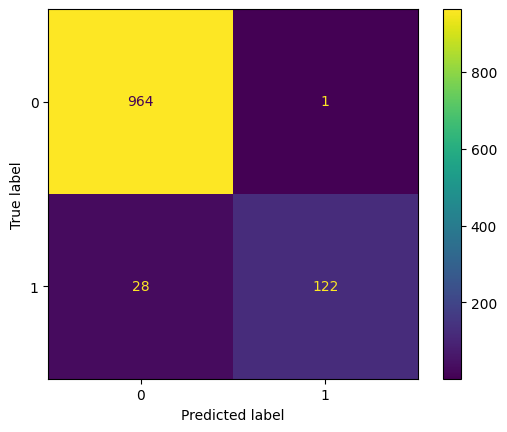

In [769]:
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred_test)
ConfusionMatrixDisplay(cm).plot()
plt.show()

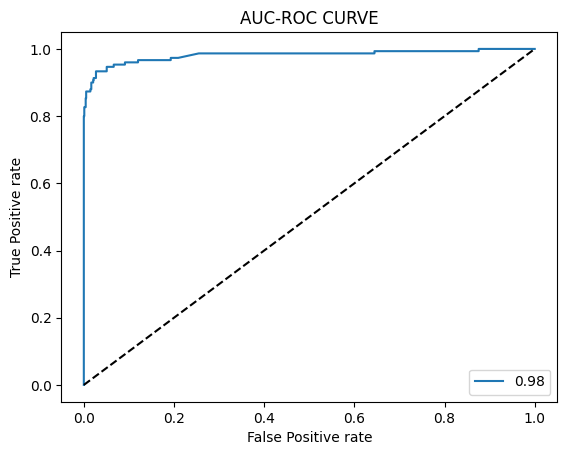

In [770]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob=nb2.predict_proba(x_test)[:,1]

fpr,tpr,thresold=roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label=f"{round(roc_auc_score(y_test,y_pred_prob),2)}")
plt.plot([0,1],[0,1],linestyle="dashed",color="black")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("AUC-ROC CURVE")
plt.legend()
plt.show()

#### Average Word2vec

In [771]:
def text_words(text):
    words=word_tokenize(text)
    clean_word=[word for word in words if word not in stopword and len(word)>2]
    return clean_word

df["text_clean"]=df["text_clean"].apply(text_words)

In [772]:
df["text_clean"][0]

['jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'great',
 'world',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [773]:
! pip install gensim

In [774]:
from gensim.models import Word2Vec
model=Word2Vec(sentences=df["text_clean"],vector_size=100,window=5,min_count=1,workers=4,sg=0,seed=42)

vector=model.wv["world"]
similar=model.wv.most_similar("world",topn=5)
print(similar)

[('like', 0.9985832571983337), ('back', 0.9985138177871704), ('today', 0.9984689354896545), ('give', 0.9984394311904907), ('make', 0.998429000377655)]


In [775]:
print(vector)

[ 5.43354116e-02 -3.48722562e-02 -1.38220042e-01 -2.07461533e-03
 -1.16480291e-01  1.16762795e-01  1.44393936e-01  9.85233411e-02
 -4.62419316e-02 -5.19955941e-02 -2.26062149e-01  8.23430493e-02
  4.83997017e-02  1.90636680e-01 -8.64990577e-02 -1.26813769e-01
  4.94477302e-02 -1.71507344e-01 -9.95132253e-02 -3.91178988e-02
  4.30374034e-02  1.42357200e-01  2.62859315e-02  1.50002375e-01
  3.84782366e-02 -7.30832899e-03 -1.72391742e-01  8.62135142e-02
 -1.22044839e-01 -8.78534764e-02 -6.47231266e-02 -4.82099131e-02
  7.54073933e-02 -3.20989117e-02  7.08534569e-02 -4.32204716e-02
  9.23415050e-02 -2.78748840e-01  5.27955703e-02  9.29720476e-02
  5.12480736e-02  3.07565685e-02  2.42918313e-01 -3.18030827e-02
  2.60923896e-02  7.24109486e-02  9.64988992e-02  1.34620816e-01
  2.78725713e-01 -6.83959648e-02 -1.44689620e-01 -3.34889531e-01
 -8.27679469e-04  5.30363545e-02  8.80581439e-02 -2.46760529e-02
 -7.30303004e-02  5.23155592e-02 -1.70983337e-02  1.67001784e-01
 -6.60147965e-02 -5.57625

In [776]:
import numpy as np
def sentence_vector(text,model):
    vecs=[model.wv[word] for word in text]
    if not vecs:
        return np.zeros(model.vector_size)
    return np.mean(vecs,axis=0)

df["vector"]=df["text_clean"].apply(lambda x:sentence_vector(x,model))

In [777]:
df["vector"][0]

array([ 4.19875570e-02, -2.45294571e-02, -1.11286841e-01, -2.59614870e-04,
       -9.22992527e-02,  9.23943296e-02,  1.21457182e-01,  8.59588012e-02,
       -3.68163772e-02, -3.97569574e-02, -1.94469944e-01,  6.39341548e-02,
        4.78642993e-02,  1.65635869e-01, -6.35166541e-02, -1.01367533e-01,
        4.20717262e-02, -1.52034923e-01, -8.31064582e-02, -2.49529611e-02,
        4.27883305e-02,  1.20362602e-01,  2.50711944e-02,  1.25107929e-01,
        3.51315662e-02, -4.31986945e-03, -1.46879271e-01,  7.90657699e-02,
       -1.02072410e-01, -7.01465085e-02, -4.81823646e-02, -3.73190679e-02,
        7.15455785e-02, -3.32039781e-02,  5.22896387e-02, -3.60936038e-02,
        8.13740790e-02, -2.32458591e-01,  4.33852784e-02,  7.94708356e-02,
        4.10676599e-02,  1.92733519e-02,  2.05165431e-01, -2.36430559e-02,
        2.80840397e-02,  5.34287095e-02,  8.18944052e-02,  1.14983581e-01,
        2.31806085e-01, -6.57239780e-02, -1.20467842e-01, -2.78490543e-01,
       -4.43822145e-03,  

In [778]:
df["vector"][0].shape

(100,)

In [779]:
X=np.vstack(df["vector"].values)

In [780]:
print(X.shape)

(5572, 100)


In [781]:
X_df=pd.DataFrame(X,columns=list(range(100)))
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.041988,-0.024529,-0.111287,-0.000260,-0.092299,0.092394,0.121457,0.085959,-0.036816,-0.039757,...,-0.171664,0.197904,0.041487,-0.129988,0.073243,-0.080216,-0.032549,0.110969,-0.101828,-0.016323
1,0.019050,-0.009768,-0.058217,-0.001147,-0.048197,0.047530,0.055696,0.039968,-0.017289,-0.014902,...,-0.084477,0.092119,0.020763,-0.067881,0.034086,-0.035986,-0.018136,0.055076,-0.049619,-0.009269
2,0.056561,-0.032386,-0.135206,0.004877,-0.116848,0.116995,0.156684,0.104029,-0.047866,-0.052992,...,-0.222741,0.250313,0.051872,-0.160698,0.090802,-0.098736,-0.046059,0.140055,-0.132415,-0.020849
3,0.071861,-0.038583,-0.197816,-0.001352,-0.161479,0.166846,0.218694,0.154221,-0.065367,-0.067578,...,-0.314365,0.357526,0.064287,-0.235859,0.132231,-0.143146,-0.065419,0.194443,-0.186297,-0.029016
4,0.069726,-0.036080,-0.178684,-0.000878,-0.142131,0.146514,0.200649,0.139861,-0.059038,-0.064588,...,-0.276100,0.317303,0.064080,-0.211926,0.116561,-0.123258,-0.054262,0.173414,-0.163951,-0.029920


In [782]:
X_df["label"]=df["label"]
y=df["label"]
x=X_df.iloc[:,:-1]
#y=X_df.loc[:,["label"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [783]:
from sklearn.linear_model import LogisticRegression
logic=LogisticRegression()
logic.fit(x_train,y_train)

LogisticRegression()

In [784]:
train_accuracy=logic.score(x_train,y_train)
print(train_accuracy)

0.8653803006506618


In [785]:
y_pred_word=logic.predict(x_test)

In [786]:
print(accuracy_score(y_pred_word,y_test))

0.8645739910313901


In [787]:
print(classification_report(y_test,y_pred_word))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       965
           1       0.00      0.00      0.00       150

    accuracy                           0.86      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.86      0.80      1115



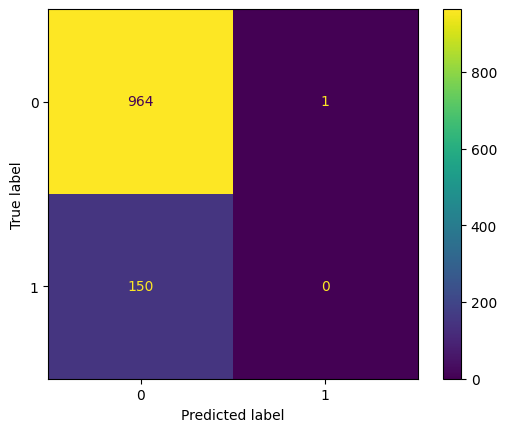

In [788]:
cm=confusion_matrix(y_test,y_pred_word)
ConfusionMatrixDisplay(cm).plot()
plt.show()

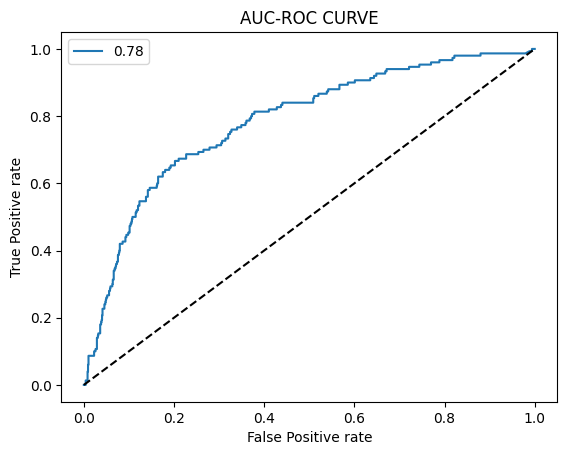

In [789]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob=logic.predict_proba(x_test)[:,1]

fpr,tpr,thresold=roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label=f"{round(roc_auc_score(y_test,y_pred_prob),2)}")
plt.plot([0,1],[0,1],linestyle="dashed",color="black")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("AUC-ROC CURVE")
plt.legend()
plt.show()

#### Comparison

In [790]:
word_embedding=pd.DataFrame({"BagofWords":0.98,"TF-IDF":0.98,"AverageWord2vec":0.78},index=["AUC-ROC"])
word_embedding_df=word_embedding.T
word_embedding_df=word_embedding_df.reset_index()
word_embedding_df



,index,AUC-ROC
0,BagofWords,0.98
1,TF-IDF,0.98
2,AverageWord2vec,0.78


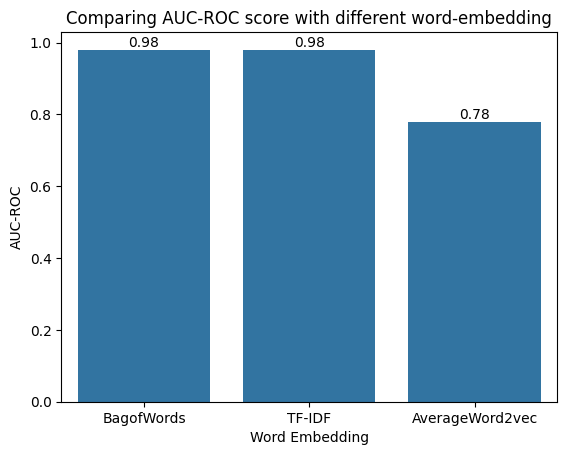

BagofWords and TF-IDF works pretty well in the spam classifier dataset.


In [791]:
bar=sns.barplot(x="index",y="AUC-ROC",data=word_embedding_df)
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{height}",ha="center",va="bottom")
    
plt.title("Comparing AUC-ROC score with different word-embedding")
plt.xlabel("Word Embedding")
plt.show()
print("BagofWords and TF-IDF works pretty well in the spam classifier dataset.")